We will be using kaggle dataset for dogs and cats. You can download files from kaggle. 

When you extract the downloaded file you will get a folder named as PetImages which contains folder for Dog and Cat with thousands of images.


We will be first creating the required file format for the model dataset and then doing classification by using SVM method of classification.

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
dir = '/home/kishor/PycharmProjects/PetImages'
categories = ['Cat', 'Dog']

for category in categories: # for folder access
    path = os.path.join(dir, category) # this command enable to go inside the PetImages folder into the Dog and Cat folders
    
    for img in os.listdir(path):#for file inside folder access
        imgpath = os.path.join(path, img) # this will get the path of each image file
        pet_img = cv2.imread(imgpath, 0) # 0 for gray scale image
        cv2.imshow('image', pet_img)
        break
    break
    
cv2.waitKey(0)
cv2.destroyAllWindows()
        

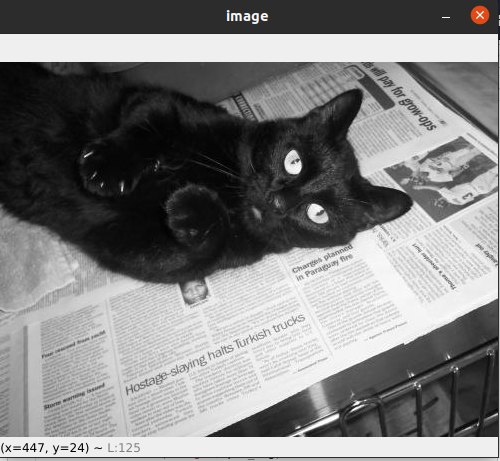



Seems like everythin is running okay. So, let's remove break statement from each loop and let the whole command to run so that pet_img will contain all of the available images from the PetImages folder.

In [5]:
dir = '/home/kishor/PycharmProjects/PetImages'
categories = ['Cat', 'Dog']

data = []


for category in categories: 
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img) 
        pet_img = cv2.imread(imgpath, 0)
        pet_img = cv2.resize(pet_img, (40, 40)) # since, images are in different size so resizing in necessary
        image = np.array(pet_img).flatten() # making array with only one row
        
        data.append([image, label])

error: OpenCV(4.4.0) /tmp/pip-req-build-vu_aq9yd/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


It seems that some of the image cannot be resized. Hence, we will apply try and except technique to handle this kind of issue.

In [4]:
dir = '/home/kishor/PycharmProjects/PetImages'
categories = ['Cat', 'Dog']

data = []


for category in categories: 
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img) 
        pet_img = cv2.imread(imgpath, 0)
        try:
            pet_img = cv2.resize(pet_img, (40, 40)) # since, images are in different size so resizing in necessary
            image = np.array(pet_img).flatten() # making array with only one row

            data.append([image, label])
        except Exception as e:
            pass # just skipping those images

In [5]:
print(len(data))

24946


Let's save that the data for future use.

In [10]:
pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 335 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pickle5

     |████████████████████████████████| 132 kB 344 kB/s eta 0:00:01
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=262038 sha256=c427b65e8bcf00c58f319bab8a706fd9995157a1e775f4358fc87142950f7f6d
  Stored in directory: /home/kishor/.cache/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pickle5 as pickle

pick_in = open('data.pickel', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [18]:
pick_in = open('data.pickel', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [19]:
print(data)

[[array([ 9, 12,  7, ..., 75, 25, 41], dtype=uint8), 0], [array([172, 161, 187, ..., 225, 222, 225], dtype=uint8), 0], [array([167,  99, 118, ...,  41,  21,  30], dtype=uint8), 0], [array([156, 167, 168, ...,  64,  58,  57], dtype=uint8), 0], [array([178, 180, 185, ...,  45,  48,  41], dtype=uint8), 0], [array([211, 207, 204, ..., 164, 166, 164], dtype=uint8), 0], [array([149, 148, 150, ...,  59,  49,  58], dtype=uint8), 0], [array([124, 124, 142, ...,  98, 105,  94], dtype=uint8), 0], [array([134, 139, 139, ...,  18,  28, 157], dtype=uint8), 0], [array([235, 225, 255, ..., 223, 247, 253], dtype=uint8), 0], [array([232, 232, 233, ...,  32,  32,  92], dtype=uint8), 0], [array([186, 186, 183, ..., 140, 174, 104], dtype=uint8), 0], [array([142, 197, 205, ...,  24,  25,  96], dtype=uint8), 0], [array([101, 112, 115, ..., 103, 102, 103], dtype=uint8), 0], [array([72, 71, 70, ..., 52, 50, 93], dtype=uint8), 0], [array([137, 153, 136, ..., 224, 200, 197], dtype=uint8), 0], [array([38, 61, 29,

In [21]:
import random

random.shuffle(data)


In [22]:
#creating train, testing data

features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [28]:
print(features)
print(labels)

[array([29, 23, 29, ..., 42, 43, 45], dtype=uint8), array([190, 125, 177, ...,  78,  77,  61], dtype=uint8), array([130,  65,  10, ..., 182, 183, 175], dtype=uint8), array([109, 110, 100, ..., 117, 112,  98], dtype=uint8), array([117, 110, 107, ..., 136, 163,  78], dtype=uint8), array([142, 145, 141, ..., 139, 149, 152], dtype=uint8), array([46, 29,  5, ..., 66, 64, 64], dtype=uint8), array([116, 117, 122, ...,  23,  15,  19], dtype=uint8), array([194, 193, 192, ..., 106, 107, 110], dtype=uint8), array([198, 224, 225, ..., 138, 190, 138], dtype=uint8), array([120, 120, 135, ..., 243, 237, 238], dtype=uint8), array([74, 74, 74, ..., 73, 75, 72], dtype=uint8), array([57, 55, 48, ..., 83, 74, 74], dtype=uint8), array([ 70,  32,   9, ..., 230, 243, 239], dtype=uint8), array([129,  83, 135, ..., 251, 248, 247], dtype=uint8), array([254, 254, 254, ..., 254, 254, 254], dtype=uint8), array([184, 188, 188, ...,  74, 138, 138], dtype=uint8), array([ 33,  11,   7, ..., 161, 146, 141], dtype=uint8

In [29]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.25)


In [ ]:
from sklearn.svm import SVC
model = SVC(c=1, gamma = 'auto', kernel = 'poly')
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

accuracy = model.score(xtest, ytest)

print(accuracy)

# Warning! considering the size of data, running this model in normal system will hang-out the pc so think before you run!

categories = ['Cat', 'Dog']
print('Prediction is: ', categories[prediction[0]])

mypet = xtest[0].reshape(40, 40) # for looking image
plt.imshow(mypet, cmap = 'gray')
plt.show()